# Load packages

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Compare results for fishing vessels, cargo and tankers, and fishing, cargo, and tankers

## Epoch level learning curves

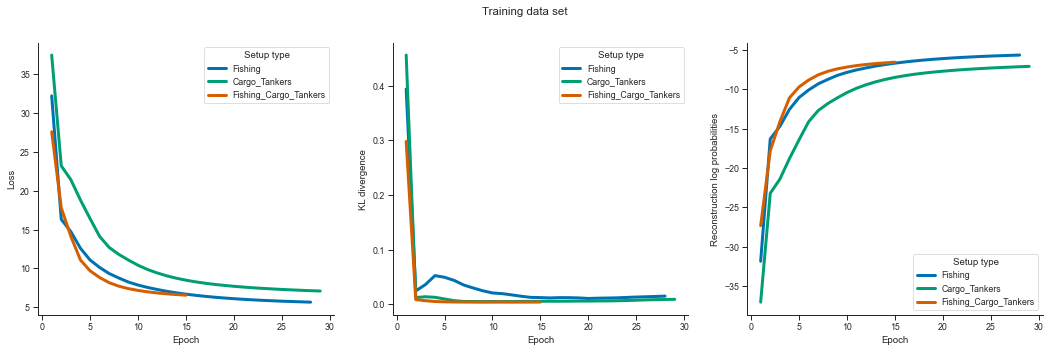

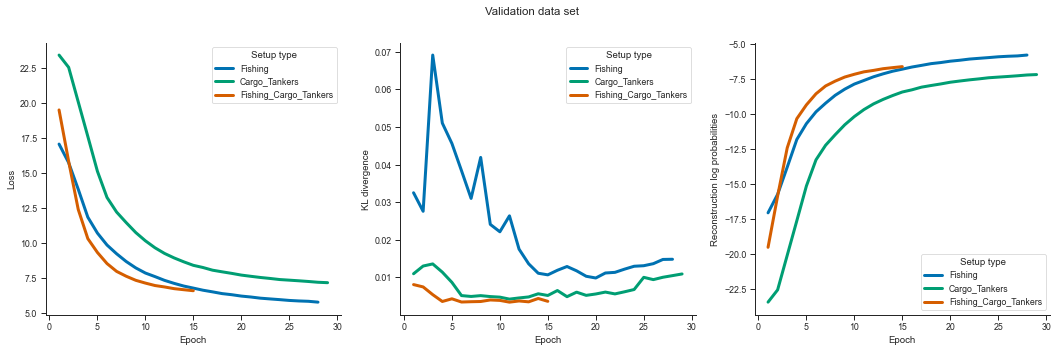

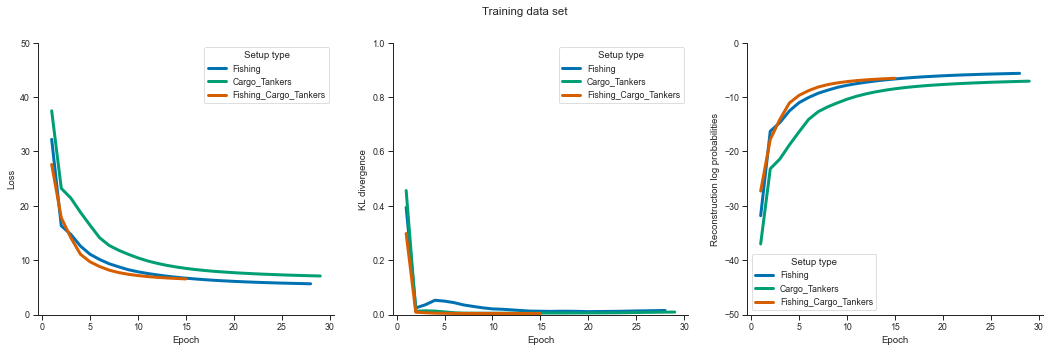

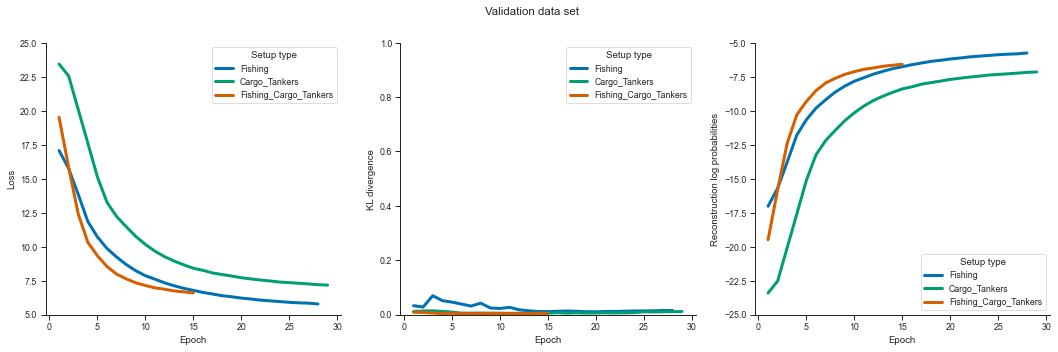

In [2]:
# Use the SummaryModels class
setup_type = "Fishing"
summary_models_fish = SummaryModels("RegionSkagen_01062019_30092019_Fish_14400_86400_600")
df_default_fish = summary_models_fish.load_curves_df(setup_type)
df_track_lvl_fish = summary_models_fish.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"] 

setup_type = "Cargo_Tankers"
summary_models_carg_tank = SummaryModels("RegionSkagen_01062019_30092019_CargTank_14400_86400_600")
df_default_carg_tank = summary_models_carg_tank.load_curves_df(setup_type)
df_track_lvl_carg_tank = data = summary_models_carg_tank.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"] 

setup_type = "Fishing_Cargo_Tankers"
summary_models_fish_carg_tank = SummaryModels("RegionSkagen_01062019_30092019_FishCargTank_14400_86400_600")
df_default_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df(setup_type)
df_track_lvl_fish_carg_tank = data = summary_models_fish_carg_tank.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"] 

# Combine the different vessel type date frames 
df = pd.concat([df_default_fish, df_default_carg_tank, df_default_fish_carg_tank])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Fishing", "Cargo_Tankers", "Fishing_Cargo_Tankers"]

# Plot the learning curves
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Zoom in
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                                          ylims=[(0, 50), (0, 1), (-50, 0)])
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order,
                                          title="Validation data set", ylims=[(5, 25), (0, 1), (-25, -5)])

## Optimizer steps level learning curves

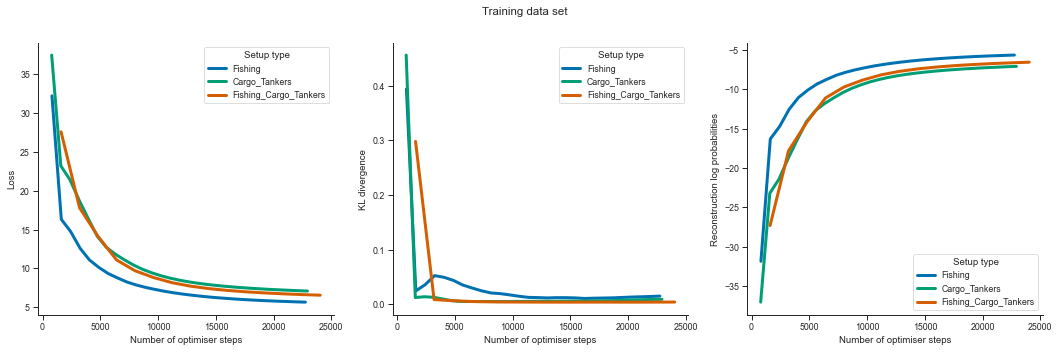

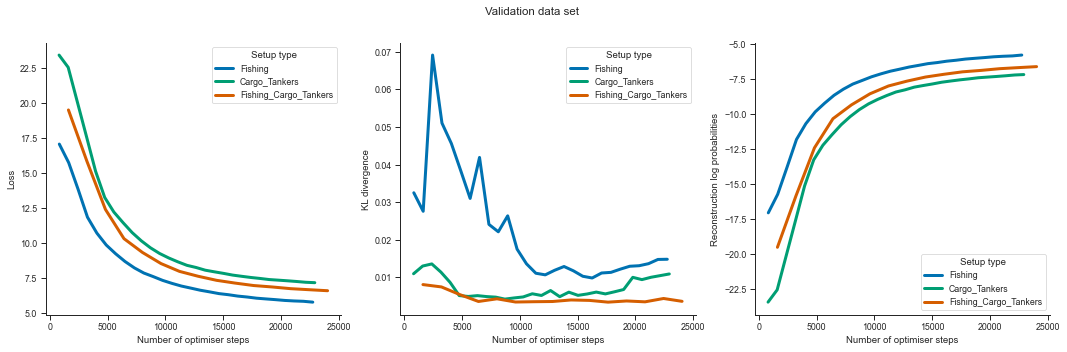

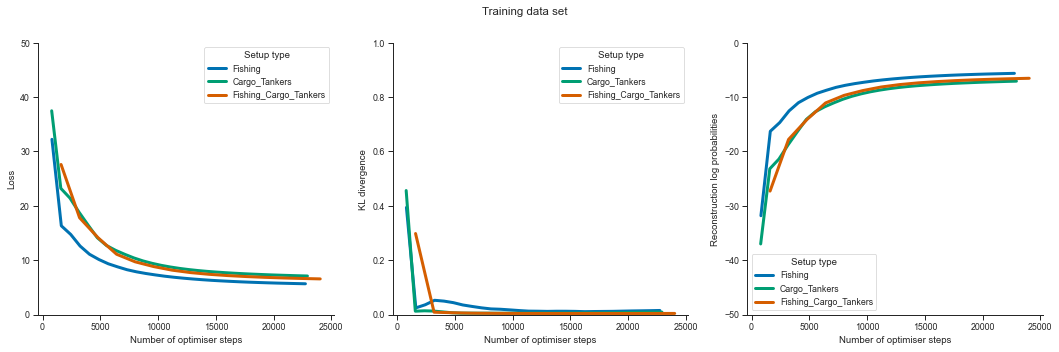

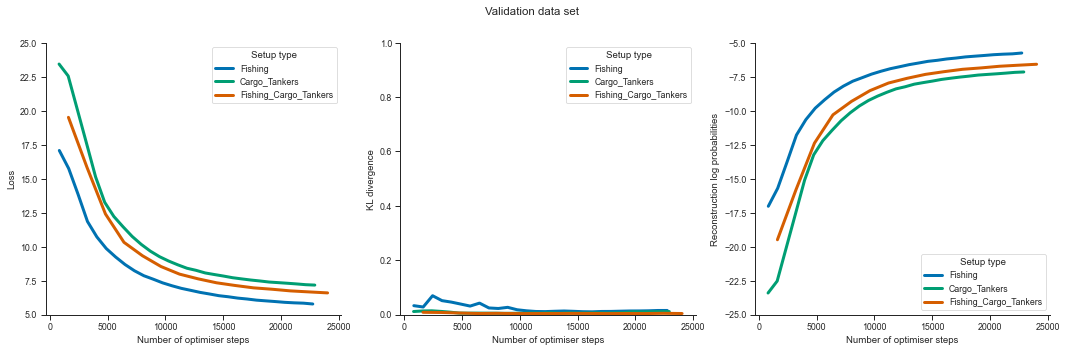

In [3]:
# Use the SummaryModels class
df_default_fish = summary_models_fish.load_curves_df("Fishing", level="Step")
df_default_carg_tank = summary_models_carg_tank.load_curves_df("Cargo_Tankers", level="Step")
df_default_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df("Fishing_Cargo_Tankers", level="Step")

# Combine the different vessel type date frames 
df = pd.concat([df_default_fish, df_default_carg_tank, df_default_fish_carg_tank])
df.reset_index(drop=True, inplace=True)

# Plot the learning curves
x="Number of optimiser steps"
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, x=x, title="Training data set")
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, x=x, title="Validation data set")

# Zoom in
ylims = [(4, 30), (0, 0.1), (-30, -4)]
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, x=x, title="Training data set",
                                          ylims=[(0, 50), (0, 1), (-50, 0)])
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, x=x,
                                          title="Validation data set", ylims=[(5, 25), (0, 1), (-25, -5)])

#### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities for fishing, cargo and tanker vessels

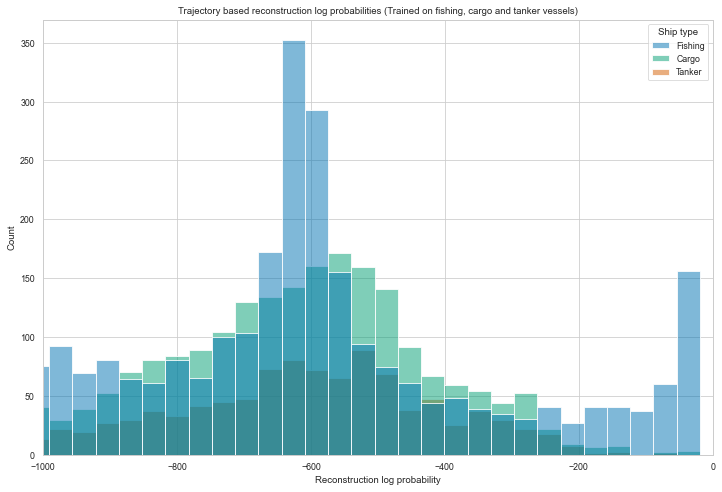

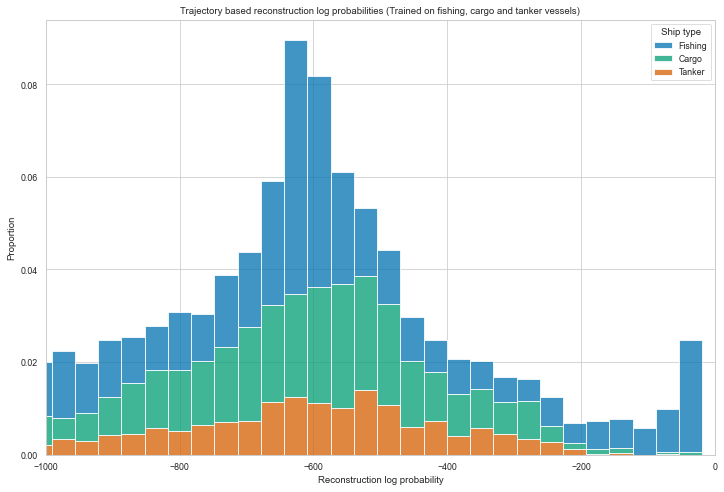

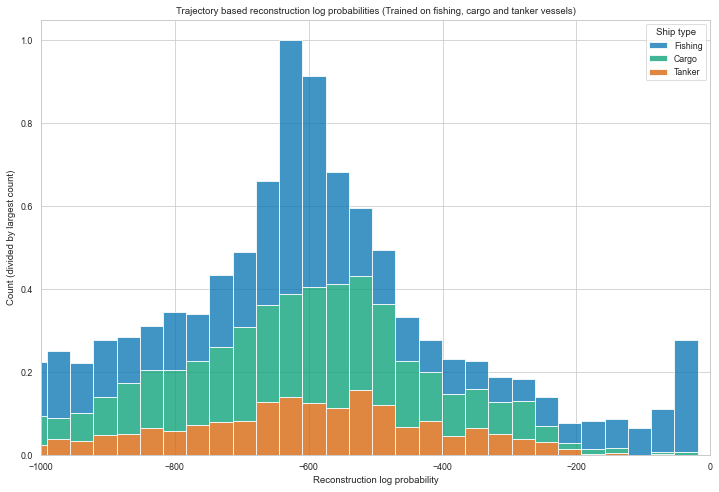

Mean Reconstruction log probability: -672.7659628387546
Median Reconstruction log probability: -629.5090026855469
Reconstruction log probability statistics by ship type: 
            count        mean         std          min         25%  \
Ship type                                                            
Cargo      2131.0 -638.857693  223.098844 -2310.039551 -763.412109   
Fishing    3248.0 -709.394252  361.276002 -1975.441406 -962.192566   
Tanker     1031.0 -627.460280  221.287495 -2108.396973 -752.652283   

                  50%         75%        max  
Ship type                                     
Cargo     -615.091614 -500.653122 -26.359537  
Fishing   -643.799744 -536.329102 -19.051033  
Tanker    -605.802368 -489.103149 -85.481308  


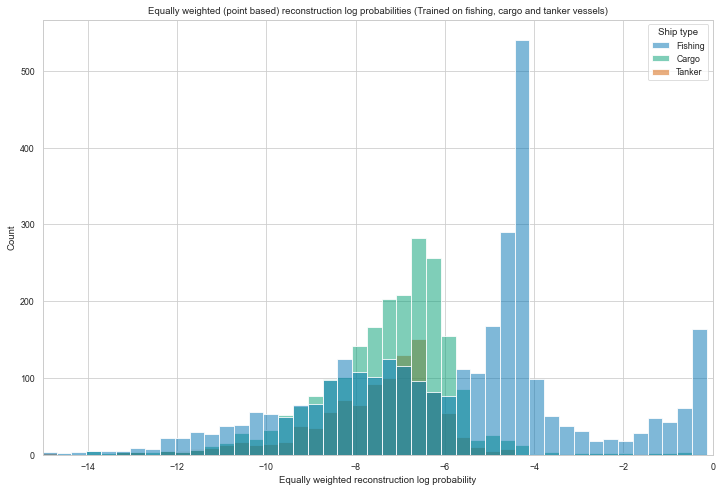

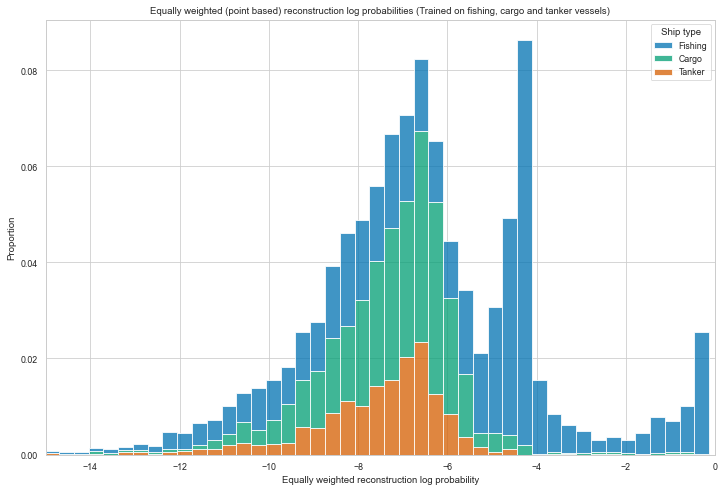

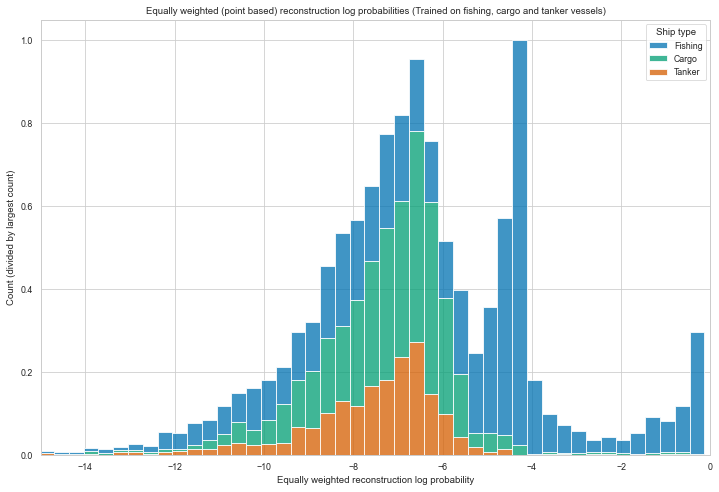

Mean Equally weighted reconstruction log probability: -6.5856179325188045
Median Equally weighted reconstruction log probability: -6.69719502484357
Equally weighted reconstruction log probability statistics by ship type: 
            count      mean       std        min       25%       50%  \
Ship type                                                              
Cargo      2131.0 -7.349005  1.698311 -23.638151 -8.091617 -7.050247   
Fishing    3248.0 -5.768529  2.879463 -14.970528 -7.796010 -5.139233   
Tanker     1031.0 -7.581863  1.622941 -19.343091 -8.281644 -7.272419   

                75%       max  
Ship type                      
Cargo     -6.341731 -0.183052  
Fishing   -4.254096 -0.133892  
Tanker    -6.588718 -0.657549  

 Look at some length statistics:
            count        mean        std   min    25%    50%    75%    max
Ship type                                                                 
Cargo      2131.0   89.357109  28.989728  25.0   74.0   88.0  110.0  144.

In [4]:
hue = "Ship type"
hue_order = ["Fishing", "Cargo", "Tanker"]

# Plot trajectory based reconstruction log probabilities for fishing, cargo and tanker vessels - Zoomed in
title = "Trajectory based reconstruction log probabilities (Trained on fishing, cargo and tanker vessels)"
x = "Reconstruction log probability"
xlim = [-1000, 0]
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Histogram", 
                                                title=title, x=x, hue=hue, hue_order=hue_order, xlim=xlim)
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Stacked", x=x, hue=hue, 
                                                title=title, hue_order=hue_order, xlim=xlim, stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Stacked", x=x, hue=hue, 
                                                title=title, hue_order=hue_order, xlim=xlim, print_summary_stats=True,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")

# Plot equally weighted (point based) reconstruction log probabilities for fishing, cargo and tanker vessels - Zoomed in
title = "Equally weighted (point based) reconstruction log probabilities (Trained on fishing, cargo and tanker vessels)"
x = "Equally weighted reconstruction log probability"
xlim = [-15, 0]
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Histogram",
                                                title=title, x=x, hue=hue, hue_order=hue_order, xlim=xlim)
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Stacked", x=x, hue=hue,
                                                title=title, hue_order=hue_order, xlim=xlim, stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Stacked", x=x, hue=hue, 
                                                title=title, hue_order=hue_order, xlim=xlim, print_summary_stats=True,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")

print("\n Look at some length statistics:")
print(df_track_lvl_fish_carg_tank.groupby("Ship type")["Length"].describe())

#### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities for fishing vessels

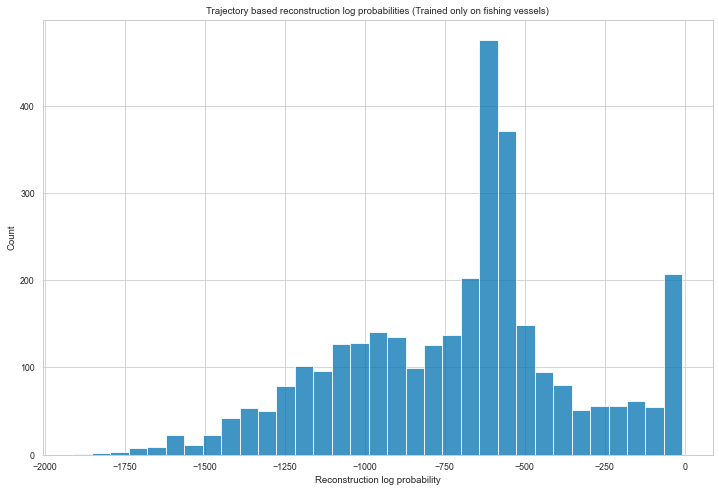

Mean Reconstruction log probability: -705.740446964655
Median Reconstruction log probability: -635.6762390136719
Reconstruction log probability statistics by ship type: 
            count        mean         std          min         25%  \
Ship type                                                            
Fishing    3248.0 -705.740447  365.463058 -1909.644287 -961.853943   

                  50%         75%       max  
Ship type                                    
Fishing   -635.676239 -527.254745 -7.547645  


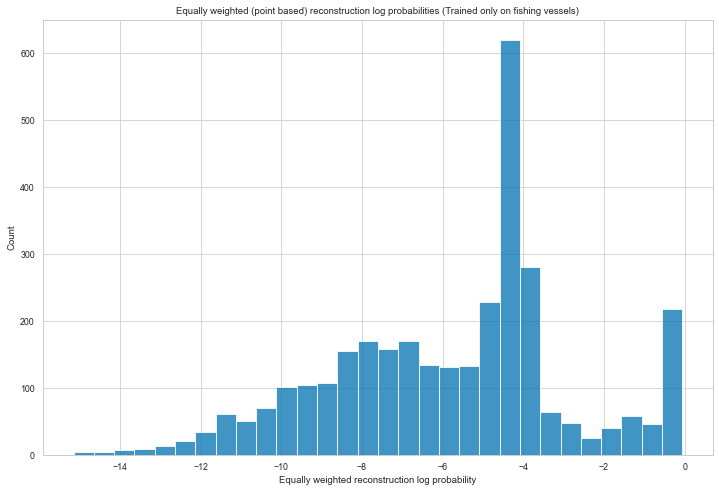

Mean Equally weighted reconstruction log probability: -5.758208973913408
Median Equally weighted reconstruction log probability: -5.09508698836253
Equally weighted reconstruction log probability statistics by ship type: 
            count      mean       std        min       25%       50%  \
Ship type                                                              
Fishing    3248.0 -5.758209  2.961614 -15.151299 -7.895644 -5.095087   

                75%       max  
Ship type                      
Fishing   -4.102643 -0.057179  

 Look at some length statistics for fishing vessels only training data set:
            count       mean        std   min    25%    50%    75%    max
Ship type                                                                
Fishing    3248.0  127.22383  27.214499  25.0  126.0  139.0  143.0  144.0


In [5]:
# Plot trajectory based reconstruction log probabilities for fishing vessels
title = "Trajectory based reconstruction log probabilities (Trained only on fishing vessels)"
x = "Reconstruction log probability"
summary_models_fish.hist_stacked_plot(df_track_lvl_fish, type="Histogram", x=x, title=title, print_summary_stats=True)

# Plot equally weighted (point based) reconstruction log probabilities for fishing vessels
title = "Equally weighted (point based) reconstruction log probabilities (Trained only on fishing vessels)"
x = "Equally weighted reconstruction log probability"
summary_models_fish.hist_stacked_plot(df_track_lvl_fish, type="Histogram", x=x, title=title, print_summary_stats=True)

print("\n Look at some length statistics for fishing vessels only training data set:")
print(df_track_lvl_fish.groupby("Ship type")["Length"].describe())

#### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities for fishing vessels - Comparison

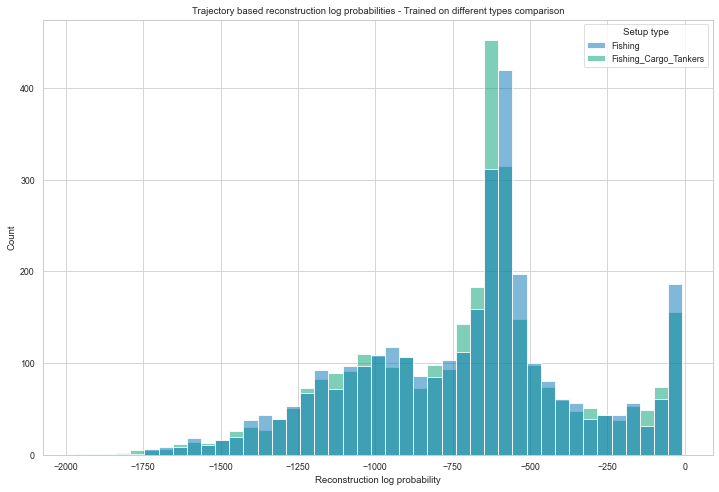

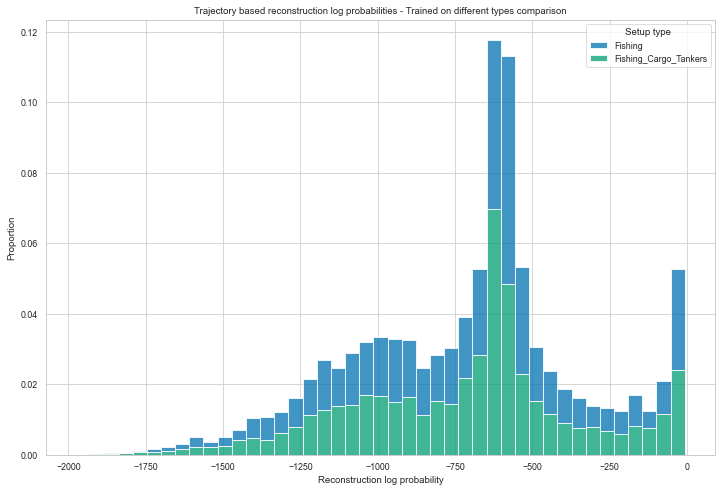

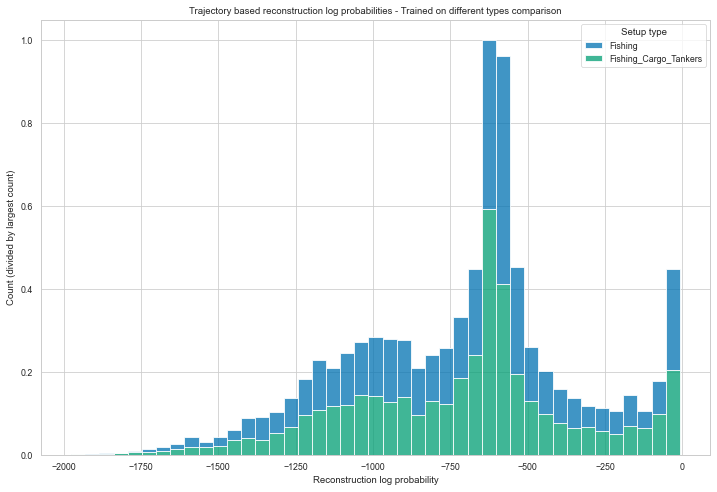

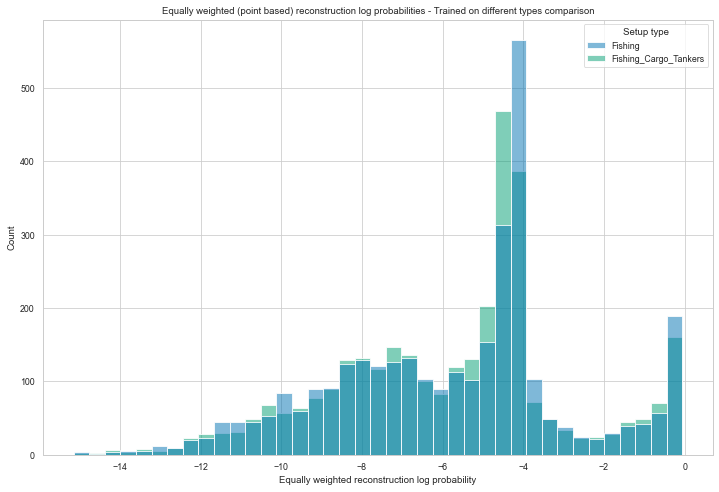

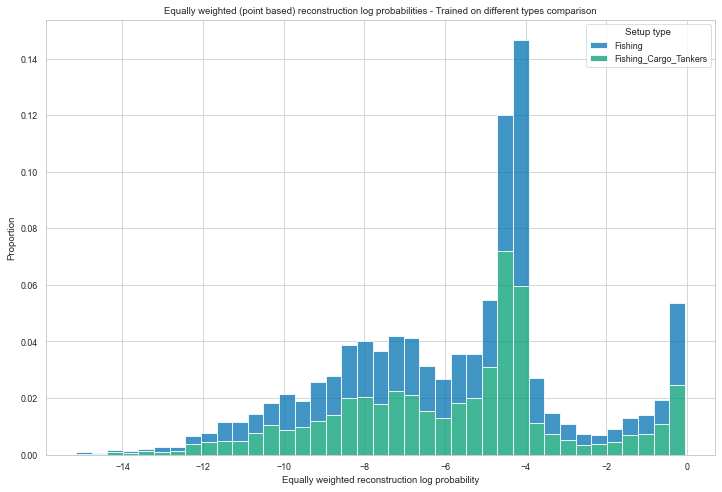

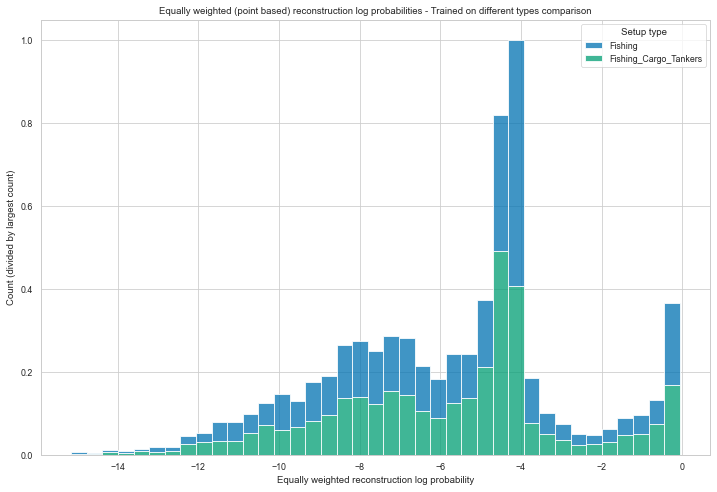

In [6]:
# Combine the different vessel type date frames (that validated on any fishing vessels)
df_all_fish = df_track_lvl_fish_carg_tank[df_track_lvl_fish_carg_tank["Ship type"] == "Fishing"]
df = pd.concat([df_all_fish, df_track_lvl_fish])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Fishing", "Fishing_Cargo_Tankers"]

# Plot trajectory based reconstruction log probabilities for fishing vessels
title = "Trajectory based reconstruction log probabilities - Trained on different types comparison"
x = "Reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Histogram", title=title, x=x, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Stacked", x=x, hue=hue, title=title, hue_order=hue_order, 
                                                stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Stacked", x=x, hue=hue, title=title, hue_order=hue_order,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")

# Plot equally weighted (point based) reconstruction log probabilities for fishing vessels
title = "Equally weighted (point based) reconstruction log probabilities - Trained on different types comparison"
x = "Equally weighted reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Histogram", title=title, x=x, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Stacked", x=x, hue=hue, title=title, hue_order=hue_order,
                                                stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Stacked", x=x, hue=hue, title=title, hue_order=hue_order,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")